In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import holoviews as hv
from holoviews.operation.datashader import datashade
from holoviews import opts
hv.extension('bokeh')


In [20]:
DATA_ROOT='/media/mike/internal/agnfinder'

In [21]:
!ls {DATA_ROOT}

cpz_paper_sample.parquet	       LIBRARY_XXLN_Spirals.lib.dat.fits
LIBRARY_STAR_XXL_North.dat.fits        LIBRARY_XXLN_Starburst.lib.dat.fits
LIBRARY_XXLN_AGN.lib.dat.fits	       README
LIBRARY_XXLN_Ellipticals.lib.dat.fits  uK_IR_final.fits
LIBRARY_XXLN_QSO.lib.dat.fits


# Visualise Observed Galaxies

In [22]:
parquet_loc = os.path.join(DATA_ROOT, 'cpz_paper_sample.parquet')

In [23]:
# save to parquet for quick reading, including of specific columns
if not os.path.isfile(parquet_loc):
    Table.read(os.path.join(DATA_ROOT, 'uK_IR_final.fits')).to_pandas().to_parquet(parquet_loc)

In [24]:
metadata_cols = ['id', 'alpha', 'delta', 'redshift', 'hclass', 'hquality',
       'survey_quality', 'survey_comment', 'sp_survey']

In [25]:
case_cols = ['CASE_I_a0_01', 'CASE_I_a0_001', 'CASE_I_a0', 'CASE_II_a0_05',
       'CASE_II_a0_01', 'CASE_II_a0_001', 'CASE_II_a0', 'CASE_II_b0_05',
       'CASE_II_b0_01', 'CASE_II_b0_001', 'CASE_II_b0', 'CASE_III_a0_05',
       'CASE_III_a0_01', 'CASE_III_a0_001', 'CASE_III_a0',
       'CASE_III_b0_05', 'CASE_III_b0_01', 'CASE_III_b0_001',
       'CASE_III_b0', 'CASE_III_c0_05', 'CASE_III_c0_01',
       'CASE_III_c0_001', 'CASE_III_c0', 'CASE_III_d0_05',
       'CASE_III_d0_01', 'CASE_III_d0_001', 'CASE_III_d0']

In [26]:
unified_cols = ['fuv', 'nuv',
       'u', 'g', 'r', 'i', 'z', 'y', 'j', 'h', 'k', 'w1', 'w2', 'w3',
       'w4', 'fuv3', 'nuv3', 'u3', 'g3', 'r3', 'i3', 'z3', 'y3', 'j3',
       'h3', 'k3', 'fuv_err', 'nuv_err', 'u_err', 'g_err', 'r_err',
       'i_err', 'z_err', 'y_err', 'j_err', 'h_err', 'k_err', 'w1_err',
       'w2_err', 'w3_err', 'w4_err', 'fuv3_err', 'nuv3_err', 'u3_err',
       'g3_err', 'r3_err', 'i3_err', 'z3_err', 'y3_err', 'j3_err',
       'h3_err', 'k3_err', 'u_hlr', 'g_hlr', 'r_hlr', 'i_hlr', 'z_hlr',
       'y_hlr', 'j_hlr', 'h_hlr', 'k_hlr']  # what is hlr?

In [27]:
sdss_cols = ['id_sdss_u_dr12',
       'tile_name_sdss_u_dr12', 'alpha_sdss_u_dr12', 'delta_sdss_u_dr12',
       'flags_sdss_u_dr12', 'flux_radius_sdss_u_dr12', 'fwhm_sdss_u_dr12',
       'mag_auto_sdss_u_dr12', 'magerr_auto_sdss_u_dr12',
       'mag_aper2_sdss_u_dr12', 'magerr_aper2_sdss_u_dr12',
       'mag_aper3_sdss_u_dr12', 'magerr_aper3_sdss_u_dr12',
       'id_sdss_g_dr12', 'tile_name_sdss_g_dr12', 'alpha_sdss_g_dr12',
       'delta_sdss_g_dr12', 'flags_sdss_g_dr12',
       'flux_radius_sdss_g_dr12', 'fwhm_sdss_g_dr12',
       'mag_auto_sdss_g_dr12', 'magerr_auto_sdss_g_dr12',
       'mag_aper2_sdss_g_dr12', 'magerr_aper2_sdss_g_dr12',
       'mag_aper3_sdss_g_dr12', 'magerr_aper3_sdss_g_dr12',
       'id_sdss_r_dr12', 'tile_name_sdss_r_dr12', 'alpha_sdss_r_dr12',
       'delta_sdss_r_dr12', 'flags_sdss_r_dr12',
       'flux_radius_sdss_r_dr12', 'fwhm_sdss_r_dr12',
       'mag_auto_sdss_r_dr12', 'magerr_auto_sdss_r_dr12',
       'mag_aper2_sdss_r_dr12', 'magerr_aper2_sdss_r_dr12',
       'mag_aper3_sdss_r_dr12', 'magerr_aper3_sdss_r_dr12',
       'id_sdss_i_dr12', 'tile_name_sdss_i_dr12', 'alpha_sdss_i_dr12',
       'delta_sdss_i_dr12', 'flags_sdss_i_dr12',
       'flux_radius_sdss_i_dr12', 'fwhm_sdss_i_dr12',
       'mag_auto_sdss_i_dr12', 'magerr_auto_sdss_i_dr12',
       'mag_aper2_sdss_i_dr12', 'magerr_aper2_sdss_i_dr12',
       'mag_aper3_sdss_i_dr12', 'magerr_aper3_sdss_i_dr12',
       'id_sdss_z_dr12', 'tile_name_sdss_z_dr12', 'alpha_sdss_z_dr12',
       'delta_sdss_z_dr12', 'flags_sdss_z_dr12',
       'flux_radius_sdss_z_dr12', 'fwhm_sdss_z_dr12',
       'mag_auto_sdss_z_dr12', 'magerr_auto_sdss_z_dr12',
       'mag_aper2_sdss_z_dr12', 'magerr_aper2_sdss_z_dr12',
       'mag_aper3_sdss_z_dr12', 'magerr_aper3_sdss_z_dr12']

### For convenience, define groups of columns

In [46]:
"""
Schema:
- IDENT: unique id?
- Z_BEST: best matching template from library
- Z_BEST68_{LOW}{HIGH}: solutions for 68% confidence (chi-squared = 1.0) in z likelihood from template
- Z_ML: "Zphot from Median of ML distribution"
- CHI_BEST: lowest chi-squared value from template fit
- MOD_BEST: index of best-fitting template?
- EXTLAW_BEST: index of best extinction law?
- EBV_BEST: Extinction value?
- MAG_ABS: Absolute magnitude (over all bands?) of best-fitting template?
- PDZ_BEST: Integrated template probability between z_best +/- 0.1(1+z)
- SCALE_BEST: "Scaling factor", presumably a free param. to scale the template from normalised form to match the observed mags.
- DIST_MOD_BEST: Distance modulus ('DM') of best-fitting template
Suffix: template library used
"""

template_cols_all_models = [
    'IDENT_ALL_MODELS', 'Z_BEST_ALL_MODELS', 'Z_BEST68_LOW_ALL_MODELS',
       'Z_BEST68_HIGH_ALL_MODELS', 'Z_ML_ALL_MODELS',
       'CHI_BEST_ALL_MODELS', 'MOD_BEST_ALL_MODELS',
       'EXTLAW_BEST_ALL_MODELS', 'EBV_BEST_ALL_MODELS',
       'MAG_ABS_BEST_ALL_MODELS', 'PDZ_BEST_ALL_MODELS',
       'SCALE_BEST_ALL_MODELS', 'DIST_MOD_BEST_ALL_MODELS',
       'NBAND_USED_ALL_MODELS', 'Z_SEC_ALL_MODELS', 'CHI_SEC_ALL_MODELS',
       'MOD_SEC_ALL_MODELS', 'MOD_STAR_ALL_MODELS', 'CHI_STAR_ALL_MODELS',
       'CONTEXT_ALL_MODELS', 'ZSPEC_ALL_MODELS']

template_cols_passive = [
    'IDENT_PASSIVE_pure',
       'Z_BEST_PASSIVE_pure', 'Z_BEST68_LOW_PASSIVE_pure',
       'Z_BEST68_HIGH_PASSIVE_pure', 'Z_ML_PASSIVE_pure',
       'CHI_BEST_PASSIVE_pure', 'MOD_BEST_PASSIVE_pure',
       'EXTLAW_BEST_PASSIVE_pure', 'EBV_BEST_PASSIVE_pure',
       'MAG_ABS_BEST_PASSIVE_pure', 'PDZ_BEST_PASSIVE_pure',
       'SCALE_BEST_PASSIVE_pure', 'DIST_MOD_BEST_PASSIVE_pure',
       'NBAND_USED_PASSIVE_pure', 'Z_SEC_PASSIVE_pure',
       'CHI_SEC_PASSIVE_pure', 'MOD_SEC_PASSIVE_pure',
       'MOD_STAR_PASSIVE_pure', 'CHI_STAR_PASSIVE_pure',
       'CONTEXT_PASSIVE_pure', 'ZSPEC_PASSIVE_pure']

template_cols_starforming = [
       'IDENT_STARFORMING_pure', 'Z_BEST_STARFORMING_pure',
       'Z_BEST68_LOW_STARFORMING_pure', 'Z_BEST68_HIGH_STARFORMING_pure',
       'Z_ML_STARFORMING_pure', 'CHI_BEST_STARFORMING_pure',
       'MOD_BEST_STARFORMING_pure', 'EXTLAW_BEST_STARFORMING_pure',
       'EBV_BEST_STARFORMING_pure', 'MAG_ABS_BEST_STARFORMING_pure',
       'PDZ_BEST_STARFORMING_pure', 'SCALE_BEST_STARFORMING_pure',
       'DIST_MOD_BEST_STARFORMING_pure', 'NBAND_USED_STARFORMING_pure',
       'Z_SEC_STARFORMING_pure', 'CHI_SEC_STARFORMING_pure',
       'MOD_SEC_STARFORMING_pure', 'MOD_STAR_STARFORMING_pure',
       'CHI_STAR_STARFORMING_pure', 'CONTEXT_STARFORMING_pure',
       'ZSPEC_STARFORMING_pure']

template_cols_extreme_starforming = [
    'IDENT_EXTREME_STARFORMING_pure',
       'Z_BEST_EXTREME_STARFORMING_pure',
       'Z_BEST68_LOW_EXTREME_STARFORMING_pure',
       'Z_BEST68_HIGH_EXTREME_STARFORMING_pure',
       'Z_ML_EXTREME_STARFORMING_pure',
       'CHI_BEST_EXTREME_STARFORMING_pure',
       'MOD_BEST_EXTREME_STARFORMING_pure',
       'EXTLAW_BEST_EXTREME_STARFORMING_pure',
       'EBV_BEST_EXTREME_STARFORMING_pure',
       'MAG_ABS_BEST_EXTREME_STARFORMING_pure',
       'PDZ_BEST_EXTREME_STARFORMING_pure',
       'SCALE_BEST_EXTREME_STARFORMING_pure',
       'DIST_MOD_BEST_EXTREME_STARFORMING_pure',
       'NBAND_USED_EXTREME_STARFORMING_pure',
       'Z_SEC_EXTREME_STARFORMING_pure',
       'CHI_SEC_EXTREME_STARFORMING_pure',
       'MOD_SEC_EXTREME_STARFORMING_pure',
       'MOD_STAR_EXTREME_STARFORMING_pure',
       'CHI_STAR_EXTREME_STARFORMING_pure',
       'CONTEXT_EXTREME_STARFORMING_pure',
       'ZSPEC_EXTREME_STARFORMING_pure']

template_cols_agn = ['IDENT_AGN_pure',
       'Z_BEST_AGN_pure', 'Z_BEST68_LOW_AGN_pure',
       'Z_BEST68_HIGH_AGN_pure', 'Z_ML_AGN_pure', 'CHI_BEST_AGN_pure',
       'MOD_BEST_AGN_pure', 'EXTLAW_BEST_AGN_pure', 'EBV_BEST_AGN_pure',
       'MAG_ABS_BEST_AGN_pure', 'PDZ_BEST_AGN_pure',
       'SCALE_BEST_AGN_pure', 'DIST_MOD_BEST_AGN_pure',
       'NBAND_USED_AGN_pure', 'Z_SEC_AGN_pure', 'CHI_SEC_AGN_pure',
       'MOD_SEC_AGN_pure', 'MOD_STAR_AGN_pure', 'CHI_STAR_AGN_pure',
       'CONTEXT_AGN_pure', 'ZSPEC_AGN_pure']

template_cols_qso_pure = ['IDENT_QSO_pure',
       'Z_BEST_QSO_pure', 'Z_BEST68_LOW_QSO_pure',
       'Z_BEST68_HIGH_QSO_pure', 'Z_ML_QSO_pure', 'CHI_BEST_QSO_pure',
       'MOD_BEST_QSO_pure', 'EXTLAW_BEST_QSO_pure', 'EBV_BEST_QSO_pure',
       'MAG_ABS_BEST_QSO_pure', 'PDZ_BEST_QSO_pure',
       'SCALE_BEST_QSO_pure', 'DIST_MOD_BEST_QSO_pure',
       'NBAND_USED_QSO_pure', 'Z_SEC_QSO_pure', 'CHI_SEC_QSO_pure',
       'MOD_SEC_QSO_pure', 'MOD_STAR_QSO_pure', 'CHI_STAR_QSO_pure',
       'CONTEXT_QSO_pure', 'ZSPEC_QSO_pure']

template_cols_star = ['IDENT_STAR', 'Z_BEST_STAR',
       'Z_BEST68_LOW_STAR', 'Z_BEST68_HIGH_STAR', 'Z_ML_STAR',
       'CHI_BEST_STAR', 'MOD_BEST_STAR', 'EXTLAW_BEST_STAR',
       'EBV_BEST_STAR', 'MAG_ABS_BEST_STAR', 'PDZ_BEST_STAR',
       'SCALE_BEST_STAR', 'DIST_MOD_BEST_STAR', 'NBAND_USED_STAR',
       'Z_SEC_STAR', 'CHI_SEC_STAR', 'MOD_SEC_STAR', 'MOD_STAR_STAR',
       'CHI_STAR_STAR', 'CONTEXT_STAR', 'ZSPEC_STAR']

template_cols_galaxies = ['IDENT_GALAXIES',
       'Z_BEST_GALAXIES', 'Z_BEST68_LOW_GALAXIES',
       'Z_BEST68_HIGH_GALAXIES', 'Z_ML_GALAXIES', 'CHI_BEST_GALAXIES',
       'MOD_BEST_GALAXIES', 'EXTLAW_BEST_GALAXIES', 'EBV_BEST_GALAXIES',
       'MAG_ABS_BEST_GALAXIES', 'PDZ_BEST_GALAXIES',
       'SCALE_BEST_GALAXIES', 'DIST_MOD_BEST_GALAXIES',
       'NBAND_USED_GALAXIES', 'Z_SEC_GALAXIES', 'CHI_SEC_GALAXIES',
       'MOD_SEC_GALAXIES', 'MOD_STAR_GALAXIES', 'CHI_STAR_GALAXIES',
       'CONTEXT_GALAXIES', 'ZSPEC_GALAXIES']

template_cols_agn = ['IDENT_AGN', 'Z_BEST_AGN',
       'Z_BEST68_LOW_AGN', 'Z_BEST68_HIGH_AGN', 'Z_ML_AGN',
       'CHI_BEST_AGN', 'MOD_BEST_AGN', 'EXTLAW_BEST_AGN', 'EBV_BEST_AGN',
       'MAG_ABS_BEST_AGN', 'PDZ_BEST_AGN', 'SCALE_BEST_AGN',
       'DIST_MOD_BEST_AGN', 'NBAND_USED_AGN', 'Z_SEC_AGN', 'CHI_SEC_AGN',
       'MOD_SEC_AGN', 'MOD_STAR_AGN', 'CHI_STAR_AGN', 'CONTEXT_AGN',
       'ZSPEC_AGN']

# what's the difference between these and qso_pure?
template_cols_qso_impure = ['IDENT_QSO', 'Z_BEST_QSO', 'Z_BEST68_LOW_QSO',
       'Z_BEST68_HIGH_QSO', 'Z_ML_QSO', 'CHI_BEST_QSO', 'MOD_BEST_QSO',
       'EXTLAW_BEST_QSO', 'EBV_BEST_QSO', 'MAG_ABS_BEST_QSO',
       'PDZ_BEST_QSO', 'SCALE_BEST_QSO', 'DIST_MOD_BEST_QSO',
       'NBAND_USED_QSO', 'Z_SEC_QSO', 'CHI_SEC_QSO', 'MOD_SEC_QSO',
       'MOD_STAR_QSO', 'CHI_STAR_QSO', 'CONTEXT_QSO', 'ZSPEC_QSO']

# what's the difference betwen these and STARFORMING?
template_cols_starforming_v2 = [
       'IDENT_starforming', 'Z_BEST_starforming',
       'Z_BEST68_LOW_starforming', 'Z_BEST68_HIGH_starforming',
       'Z_ML_starforming', 'CHI_BEST_starforming', 'MOD_BEST_starforming',
       'EXTLAW_BEST_starforming', 'EBV_BEST_starforming',
       'MAG_ABS_BEST_starforming', 'PDZ_BEST_starforming',
       'SCALE_BEST_starforming', 'DIST_MOD_BEST_starforming',
       'NBAND_USED_starforming', 'Z_SEC_starforming',
       'CHI_SEC_starforming', 'MOD_SEC_starforming',
       'MOD_STAR_starforming', 'CHI_STAR_starforming',
       'CONTEXT_starforming', 'ZSPEC_starforming']

z_errors_vs_spectro = ['Dz_ALL_MODELS',
       'Dz_GALAXIES', 'Dz_AGN', 'Dz_QSO', 'Dz_PASSIVE_pure',
       'Dz_STARFORMING_pure', 'Dz_EXTREME_STARFORMING_pure',
       'Dz_starforming', 'Dz_AGN_pure']

In [30]:
df = pd.read_parquet(parquet_loc, columns=metadata_cols + unified_cols)

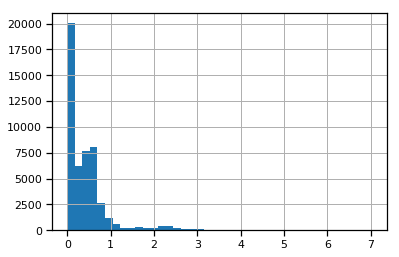

In [31]:
df['redshift'].hist(bins=40)

In [32]:
df['hclass'].value_counts()  # need to review what this means

-1    25447
 1    11392
 0     7693
 3     4192
 2      496
Name: hclass, dtype: int64

In [33]:
df['hquality'].value_counts()  # hquality is always 1

1    49220
Name: hquality, dtype: int64

In [34]:
df['sp_survey'].value_counts()  # origin of the spectro. data. Vast majority is SDSS DR12.

b'sdss_dr12  '    32566
b'gama_dr2   '     7731
b'primus_dr1 '     7401
b'vipers_dr1 '      984
b'vvds_dr2   '      473
b'sixdf_dr3  '       64
b'mosdef_dr2 '        1
Name: sp_survey, dtype: int64

In [35]:
df[unified_cols].describe()

,fuv,nuv,u,g,r,i,z,y,j,h,...,k3_err,u_hlr,g_hlr,r_hlr,i_hlr,z_hlr,y_hlr,j_hlr,h_hlr,k_hlr
count,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,...,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000,49220.000000
mean,-72.944773,-44.955462,21.230461,19.900869,18.888721,18.325473,18.206812,18.027002,17.883323,17.660793,...,0.055781,-76.451489,-76.581595,-76.646889,-76.700500,-76.705066,11.291682,76.138626,48.952311,27.026085
std,49.626540,59.867560,4.081095,2.412462,2.096278,1.890166,1.727785,1.677775,1.625514,1.560204,...,0.060924,43.074056,42.817347,42.690578,42.585378,42.607020,1551.537011,5647.609337,3099.117263,2576.324828
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,10.928569,11.035035,10.924366,10.718869,...,0.001794,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,-99.000000,-99.000000,19.419298,18.025334,17.274246,16.899129,16.836619,16.692120,16.585062,16.416512,...,0.016615,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.647167,0.659368,0.668282,0.618024
50%,-99.000000,-99.000000,21.269077,19.858417,18.806819,18.320182,18.243600,18.075588,17.933100,17.728558,...,0.037098,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.917858,0.868825,0.858653,0.815576
75%,-99.000000,21.019688,23.104966,21.818446,20.469613,19.663525,19.504382,19.259963,19.052848,18.734735,...,0.068176,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.433985,1.287739,1.259322,1.193868
max,25.914642,25.874866,33.162338,36.653717,25.110439,36.184838,23.480027,22.858922,22.694675,22.810637,...,0.886147,126.892998,130.524994,123.132004,115.106003,382.864990,158556.162798,668970.396270,427925.236530,435077.487900


In [36]:
df = pd.read_parquet(parquet_loc, columns=metadata_cols+z_errors_vs_spectro+template_cols_all_models)

In [37]:
len(df.query('Z_BEST_ALL_MODELS < 0')) # df has an outlier

1

In [38]:
df = df[df['Z_BEST_ALL_MODELS'] > 0]

(0.0, 2.5)

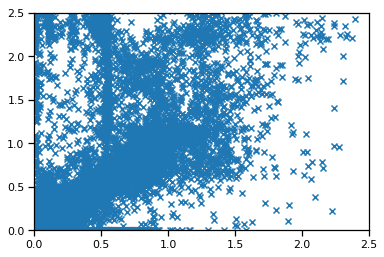

In [39]:
plt.scatter(df['Z_BEST_ALL_MODELS'], df['redshift'], marker='x')
plt.xlim([0., 2.5])
plt.ylim([0., 2.5])

(0.0, 2.5)

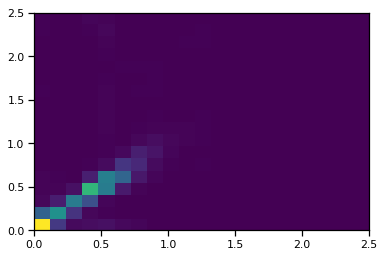

In [40]:
plt.hist2d(df['Z_BEST_ALL_MODELS'], df['redshift'], bins=(50, 50))
plt.xlim([0., 2.5])
plt.ylim([0., 2.5])

Those weren't very helpful...let's try something more serious....

In [48]:
points = datashade(hv.Scatter(df, 'Z_BEST_ALL_MODELS', 'redshift',label="Points")).opts(height=800, width=800, xlim=(0., 2.5), ylim=(0., 2.5))
points

:DynamicMap   []
   :RGB   [Z_BEST_ALL_MODELS,redshift]   (R,G,B,A)

Some interesting artifacts from the 'all models' template fitting configuration:
- many galaxies at all redshifts being placed at z=0.5, especially the highest redshift sources
- some galaxies at all redshifts being placed at z=0
- redshifts below z=1 seem far better than above z=1

In [45]:
# what does this column mean? If it means the row index of the best-fitting model, how do I work that back to the model itself?
df['MOD_BEST_ALL_MODELS'].value_counts()

7     3922
33    3312
32    2177
48    1830
6     1826
5     1658
34    1352
31    1212
4     1145
20    1091
1     1085
12    1069
47    1003
13     979
3      874
9      807
59     789
25     711
35     706
14     675
16     666
2      653
8      651
22     640
10     604
21     569
19     525
11     525
36     521
30     463
      ... 
39     401
15     385
46     364
18     339
17     337
37     282
28     256
24     227
50     219
23     211
51     192
26     190
29     185
27     181
52     179
45     178
54     137
60     124
53     121
56     120
55     115
57     114
44     101
43      88
58      84
61      80
40      74
42      61
41      43
49      25
Name: MOD_BEST_ALL_MODELS, Length: 61, dtype: int64

In [49]:
df[template_cols_all_models].iloc[54]

IDENT_ALL_MODELS            1.040000e+02
Z_BEST_ALL_MODELS           4.980000e-02
Z_BEST68_LOW_ALL_MODELS     2.570000e-02
Z_BEST68_HIGH_ALL_MODELS    7.810000e-02
Z_ML_ALL_MODELS             5.010000e-02
CHI_BEST_ALL_MODELS         7.427700e+00
MOD_BEST_ALL_MODELS         1.400000e+01
EXTLAW_BEST_ALL_MODELS      0.000000e+00
EBV_BEST_ALL_MODELS         0.000000e+00
MAG_ABS_BEST_ALL_MODELS    -1.896400e+01
PDZ_BEST_ALL_MODELS         9.959100e+01
SCALE_BEST_ALL_MODELS       2.753860e+01
DIST_MOD_BEST_ALL_MODELS    3.672480e+01
NBAND_USED_ALL_MODELS       1.100000e+01
Z_SEC_ALL_MODELS            0.000000e+00
CHI_SEC_ALL_MODELS          8.651360e+00
MOD_SEC_ALL_MODELS          2.000000e+01
MOD_STAR_ALL_MODELS        -9.990000e+02
CHI_STAR_ALL_MODELS         1.000000e+10
CONTEXT_ALL_MODELS          4.068352e+08
ZSPEC_ALL_MODELS            1.120600e-01
Name: 94, dtype: float64

### TODO break down by best-fitting class to see what's going on with the template artifacts above